In [1]:
# http://www.thejavageek.com/2018/04/30/linear-discriminant-analysis-using-python/

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

<Figure size 432x288 with 0 Axes>

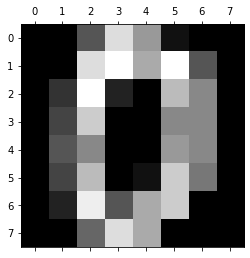

In [2]:
# 1.We shall use the same dataset used in previous assignment -digits.
# Make a 80-20 train/test split.
# [Hint:Explore datasets module from scikit learn]
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

images = digits.images.reshape(digits.images.shape[0], -1)
labels = digits.target

train_x, test_x, train_y, test_y = train_test_split(
    images, labels, random_state=10, test_size=0.20)

In [3]:
# 2.Using scikit learn perform a LDA on the dataset. Find out the number of components
# in the projected subspace.
# [Hint:Refer to discriminant analysis moduleof scikit learn]

# T0 Get 95% of Accuracy n_components should be 5
model_lda = LDA(n_components=5)
model_lda.fit(train_x, train_y)

print(model_lda.explained_variance_ratio_)

train_x = model_lda.transform(train_x)
test_x = model_lda.transform(test_x)

[0.29115346 0.1856254  0.16536448 0.1171311  0.08263054]


In [5]:

# 3.Transform the dataset and fit a logistic regression and observe the accuracy.
# Compare it with the previous model based on PCA in terms of accuracy and model complexity.
# [Hint: Project both the train and test samples to the new subspace]
log_model = LogisticRegression(max_iter=500)
log_model.fit(train_x, train_y)

predicted_values = log_model.predict(test_x)

print("Accuracy Score\n")
print(metrics.accuracy_score(predicted_values, test_y))
print("\n\n")


Accuracy Score

0.9055555555555556



